In [9]:
import numpy as np
import pandas as pd
import glob
import os
import pandas as pd

def file_reader(folder_dir):
    ret = pd.DataFrame()
    files = glob.glob(folder_dir + "/*.txt")
    for f in files:
        ret = ret.append(pd.read_csv(f, sep = " ", names = ["x", "y", "z"]), ignore_index=True)
    return ret
file_reader("HMP_Dataset/Brush_teeth")

def read_all_files():
    all_dir = glob.glob("HMP_Dataset" + "/*")
    return [file_reader(f) for f in all_dir]

help_arr = [f[12:] for f in glob.glob("HMP_Dataset" + "/*")]
print(help_arr)
frame = read_all_files()
print(len(frame))

# For Testing purpose
# frame = [frame[0], frame[1]]
top = 0
for f in frame:
    top += len(f)
len(frame[0])

['Liedown_bed', 'Walk', 'Eat_soup', 'Getup_bed', 'Descend_stairs', 'Use_telephone', 'Standup_chair', 'Brush_teeth', 'Climb_stairs', 'Sitdown_chair', 'Eat_meat', 'Comb_hair', 'Drink_glass', 'Pour_water']
14


11446

In [10]:
import math
from sklearn.cluster import KMeans
k_value = 480
k_mean_input = []
for arr in frame:
    for index in range(math.floor(len(arr)/16) - 1):
        k_mean_input += [(np.array(arr[(16 * index) : (16 * index) + 32]).flatten())] 
np.array(k_mean_input).shape
kmeans = KMeans(n_clusters=k_value).fit(np.array(k_mean_input))

In [11]:
kmeans.cluster_centers_

array([[39.        , 13.        , 54.        , ..., 33.        ,
        11.        , 35.        ],
       [19.77173913, 35.32608696, 47.07608696, ..., 18.40217391,
        37.68478261, 45.92391304],
       [35.37931034, 46.37931034, 46.98850575, ..., 39.18390805,
        38.5862069 , 50.2183908 ],
       ...,
       [13.80645161, 38.4516129 , 34.38709677, ..., 38.29032258,
        37.58064516, 51.41935484],
       [28.8       , 43.4       , 45.2       , ..., 34.8       ,
        47.4       , 45.2       ],
       [14.36734694, 38.21088435, 36.97278912, ..., 12.02721088,
        37.41496599, 36.17687075]])

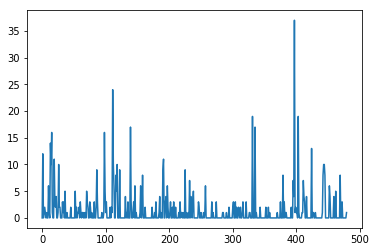

In [12]:
from matplotlib import pyplot

arr = frame[0]
k_mean_input = []

for index in range(math.floor(len(arr)/16) - 1):
    k_mean_input += [(np.array(arr[(16 * index) : (16 * index) + 32]).flatten())]
counter = np.zeros(k_value)
for i in kmeans.predict(np.array(k_mean_input)):
    counter[i] += 1
pyplot.plot(counter)

(100, 480)


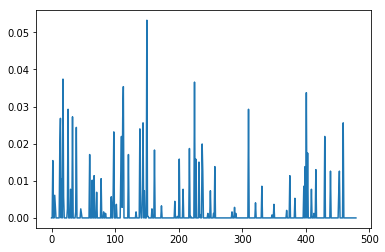

In [27]:
def file_reader(folder_dir):
    ret = pd.DataFrame()
    files = glob.glob(folder_dir + "/*.txt")
    ret = [pd.read_csv(f, sep = " ", names = ["x", "y", "z"]) for f in files]
    return ret
file_reader("HMP_Dataset/Brush_teeth")

def read_all_files():
    all_dir = glob.glob("HMP_Dataset" + "/*")
    return [file_reader(f) for f in all_dir]

help_arr = [f[12:] for f in glob.glob("HMP_Dataset" + "/*")]
many_f = read_all_files()

from matplotlib import pyplot

arr = many_f[13]
many_counter = []
for f in many_f[13]:
    k_mean_input = []
    for index in range(math.floor(len(f)/16) - 1):
        k_mean_input += [(np.array(f[(16 * index) : (16 * index) + 32]).flatten())] 
    counter = np.zeros(k_value)
    for i in kmeans.predict(np.array(k_mean_input)):
        counter[i] += 1
    many_counter += [counter]
print(np.array(many_counter).shape)
g = np.mean(np.array(many_counter), axis = 0)/np.sum(np.mean(np.array(many_counter), axis = 0))
pyplot.plot(g)

In [28]:
arr = many_f[1]
many_counter = []
new_frame = []
for arr in many_f:
    many_counter =[]
    for f in arr:
        k_mean_input = []
        for index in range(math.floor(len(f)/16) - 1):
            k_mean_input += [(np.array(f[(16 * index) : (16 * index) + 32]).flatten())] 
        counter = np.zeros(k_value)
        for i in kmeans.predict(np.array(k_mean_input)):
            counter[i] += 1
        many_counter += [counter]
    new_frame.append(many_counter)


In [7]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

import math

x_train = [[],[],[]]
y_train = [[],[],[]]
x_test = [[],[],[]]
y_test = [[],[],[]]
frame = new_frame
for i in range(len(frame)):
    kf = KFold(n_splits=3)
    temp1 = []
    temp2 = []
    for train_index, test_index in kf.split(frame[i]):
        temp1.append(train_index)
        temp2.append(test_index)
    for j in range(3):
        train = np.array(frame[i])[temp1[j]]
        test  = np.array(frame[i])[temp2[j]]

        for index in range(len(train)):
            x_train[j] += ([np.array(train[index].flatten())])
            y_train[j].append(i)
        for index in range(len(test)):
            x_test[j] += ([np.array(test[index].flatten())])
            y_test[j].append(i)

print("done")
accuracy = []
for i in range(3):
    clf = RandomForestClassifier(n_estimators = 70, max_depth = 100, random_state = 0)
    clf.fit(np.asarray(x_train[i]), np.asarray(y_train[i]))
    accuracy.append(accuracy_score(np.asarray(y_test[i]), clf.predict(x_test[i])))
    print(accuracy_score(np.asarray(y_test[i]), clf.predict(x_test[i])))
    print(confusion_matrix(np.asarray(y_test[i]), clf.predict(x_test[i])))
print(np.mean(accuracy))

done
0.775438596491228
[[ 0  0  0  3  0  0  1  0  0  4  0  1  0  1]
 [ 0 26  0  0  0  0  2  0  5  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 20  0  0 13  0  0  0  0  0  0  1]
 [ 0  0  0  0 12  0  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0  0  0  0  2  2]
 [ 0  0  0  1  0  0 30  0  0  2  0  0  1  0]
 [ 0  0  0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  2  0 31  0  0  0  0  0]
 [ 0  0  0  0  0  0  7  0  0 27  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  1  0  0  3  0  0  0 30]]
0.802158273381295
[[ 0  0  0  0  0  0  2  0  1  4  0  0  1  1]
 [ 0 24  0  0  0  0  1  0  6  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  0 21  1  0 10  0  0  0  0  0  2  0]
 [ 0  0  0  0 11  0  0  0  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  3  0]
 [ 0  0  0  2  0  0 30  0  0  1  0  0  0  1]
 [ 0  0  0  0